# Data scraping example

To run the following notebook, you have to install jupyter-notebook in VSCode
and the following libraries: 
- `numpy`
- `BeautifulSoup`
- `request`
- `matplotlib`


You can use chatGPT, if you do not know how to parse the HTML source.


First we need to import several Python libraries that we will use

In [36]:
from bs4 import BeautifulSoup   # The library to parse HTML data
from IPython.display import HTML

import requests                 # Sending a request for given URL (without browser)

import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Some settings for matplotlib plot for better presentation
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

Before put a URL to `url` variable, please make sure that you have seen
the page and it contains the data that you want to scrape.  

Sometimes the request will fail, and you need to re-run this cell notebook


In [45]:
url = "https://mobile-legends.fandom.com/wiki/List_of_heroes"    # Edit this with your selected URL
text = requests.get(url).text                                    # This will get the HTML source

soup = BeautifulSoup(text, 'html5lib')                           # Parse the HTML source into soup object

print(soup.prettify()[:20_000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of heroes | Mobile Legends: Bang Bang Wiki | Fandom
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"dcf9aeb43ec0430","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_heroes","wgTitle":"List of heroes","wgCurRevisionId":143696,"wgRevisionId":143696,"wgArticleId":14076,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Heroes","Shop"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"List_of_heroes","wgRelevantArticleId":14076,"wgI

## Get the column names

We will extract some information about of the list of Mobile Legend heroes

<img src="./img-resources/data-scraping.drawio.png" width=1000></img>

What we handle is the HTML structure in the following figure. You can see
the HTML tag `<table>` is all we need to find to get the data. After that 
we need to go down the HTML tag for the sub-tag inside it: `<th>` and `<td>
You can check that HTML structure by pressing F12 or right click on the web page
and select "Inspect"

<img src="./img-resources/data-scraping-html-structure.drawio.png" width=1000></img>

In [3]:
table = soup.find('table')               # find the first found of HTML tag <table>
                                         # and store it as a sooup object to variable `table`

# Store all column names (header of the <table>)
column_name = []
for th in table.find_all('th'):          # Get all <th> tag (all column names) in table soup object
  column_name.append(th.text.strip())    # Get the text inside <th> tag and strip unnecessary characters
                                         # Append the text to `column_name`

# Check that you get the correct header
column_name

['Hero',
 'Name',
 'Hero Code',
 'Role(s)',
 'Specialties',
 'Laning',
 'Release Year',
 'Price']

## Get all the rows

In the following code, we only show to get `name` and `release_year` data

In [4]:
rows = []

for tr in table.find_all('tr')[1:]:                       # Find all <tr> tag in table soup object
  row_data = {}                                           # Store each row into a dictioary (key-val pairs)
  all_td = tr.find_all('td')                              # Find all <td> tag in <tr> soup object
  row_data['name'] = all_td[1].text.strip()               # We know that 'name' is in second column
  row_data['release_year'] = all_td[6].text.strip()       # 'release_year' is in 7th column

  rows.append(row_data)                                   # Append each dictionary to `rows`

# Check that we get the correct data
rows

[{'name': 'Miya', 'release_year': '2016'},
 {'name': 'Balmond', 'release_year': '2016'},
 {'name': 'Saber', 'release_year': '2016'},
 {'name': 'Alice', 'release_year': '2016'},
 {'name': 'Nana', 'release_year': '2016'},
 {'name': 'Tigreal', 'release_year': '2016'},
 {'name': 'Alucard', 'release_year': '2016'},
 {'name': 'Karina', 'release_year': '2016'},
 {'name': 'Akai', 'release_year': '2016'},
 {'name': 'Franco', 'release_year': '2016'},
 {'name': 'Bane', 'release_year': '2016'},
 {'name': 'Bruno', 'release_year': '2016'},
 {'name': 'Clint', 'release_year': '2016'},
 {'name': 'Rafaela', 'release_year': '2016'},
 {'name': 'Eudora', 'release_year': '2016'},
 {'name': 'Zilong', 'release_year': '2016'},
 {'name': 'Fanny', 'release_year': '2016'},
 {'name': 'Layla', 'release_year': '2016'},
 {'name': 'Minotaur', 'release_year': '2016'},
 {'name': 'Lolita', 'release_year': '2016'},
 {'name': 'Hayabusa', 'release_year': '2016'},
 {'name': 'Freya', 'release_year': '2016'},
 {'name': 'Gord',

## Cleaning the data
In the above result, we found that the last thow heroes (`Novaria` and `Arlott`)
are not released yet. To avoid crashing when parsing the release year number
as an integer, we have to set it into `NaN` (you can choose any convention
that you think is appropriate to represent missing data)

In [5]:
release_year = []

# Scan all rows, and put NaN to the heroes that are note released yet
for row in rows:
  year = row["release_year"]
  if year != '':
    release_year.append(int(year))
  else:
    release_year.append(np.nan)

# Check that you get correct result
release_year

[2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2019,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2021,
 2020,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2021,
 2022,
 2022,
 2022,
 2022,
 2022,
 2022,
 nan,
 nan]

## Visualization

In [24]:
release_year_unique = set(release_year)
release_year_unique = [year for year in release_year_unique if year is not np.nan]
release_year_unique.sort()
release_year_unique = np.array(release_year_unique)
release_year_unique

array([2016, 2017, 2018, 2019, 2020, 2021, 2022])

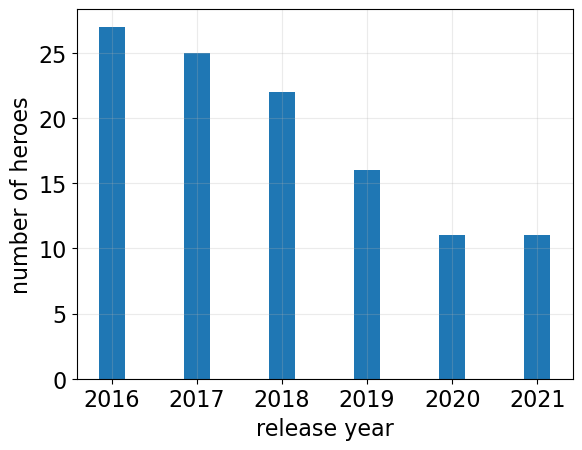

In [28]:
fig, ax = plt.subplots()

ax.hist(release_year, bins=release_year_unique-0.5, rwidth=0.3)

ax.grid("on")

ax.set_ylabel("number of heroes")
ax.set_xlabel("release year")

plt.show(fig)

We can see clearly the number of heroes that has been relased
in each year is decreasing and after that there are stagnation 
during the year 2020 and 2021